## Clean up raw data

In [5]:
# import here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set you style if you want
plt.style.use ( "ggplot" )

df_data = pd.read_csv ( "Airbnb_Open_Data.csv" ) # Raw unfiltered filter
df_data.head ( )

,Id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,min_nights,review_numbers,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,$966.00,$193.00,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,$142.00,$28.00,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,$620.00,$124.00,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,$368.00,$74.00,30.0,270.0,7/5/19,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,$204.00,$41.00,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [6]:
# Find out the initial number of rows in the raw file
print ( f' Total row length of raw data frame is { len ( df_data.index ) } ' )

 Total row length of raw data frame is 102599 


In [7]:
# drop missing values
df_data = df_data.dropna ( )
df_data.head ( )

,Id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,min_nights,review_numbers,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,$966.00,$193.00,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,$142.00,$28.00,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,$204.00,$41.00,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,$577.00,$115.00,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,...,"$1,060.00",$212.00,45.0,49.0,10/5/17,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...


In [8]:
#remove 'Id','host_id', 'lat' & 'long' series & remove the duplicate row entries
df_data.drop ( ["Id","host_id", "lat", "long" ] , axis=1, inplace=True ) 
df_data.head ( )
len ( df_data )

39763

In [9]:
# drop duplicates in raw
df_data.drop_duplicates ( inplace=True )

# check for length of row
len ( df_data.index ) 

38012

In [10]:
# reset the index
df_data = df_data.reset_index ( drop=True ) 
df_data.head ( )

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,min_nights,review_numbers,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,$966.00,$193.00,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142.00,$28.00,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204.00,$41.00,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
3,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,$577.00,$115.00,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
4,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,2009.0,"$1,060.00",$212.00,45.0,49.0,10/5/17,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...


In [11]:
df_data['price'].replace(',','', regex=True, inplace=True)

df_data['price'] = pd.to_numeric(df_data['price'].str.replace('$', '')) # apparently replace $ with nothing turns this into an object! Use this to retain the float64

df_data['service_fee'] = pd.to_numeric(df_data['service_fee'].str.replace('$', '')) # apparently replace $ with nothing turns this into an object! Use this to retain the float64

#df_data['service_fee'].replace('$','', regex=True, inplace=True)
df_data[6:8]



/var/folders/0f/nw5plln14jb67518vqj_gq9w0000gn/T/ipykernel_1176/334421440.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_data['price'] = pd.to_numeric(df_data['price'].str.replace('$', '')) # apparently replace $ with nothing turns this into an object! Use this to retain the float64
/var/folders/0f/nw5plln14jb67518vqj_gq9w0000gn/T/ipykernel_1176/334421440.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_data['service_fee'] = pd.to_numeric(df_data['service_fee'].str.replace('$', '')) # apparently replace $ with nothing turns this into an object! Use this to retain the float64


,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,min_nights,review_numbers,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
6,Cozy Clean Guest Room - Family Apt,unconfirmed,Carl,Manhattan,Upper West Side,False,strict,Private room,2015.0,291.0,58.0,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....
7,Beautiful 1br on Upper West Side,verified,Alan,Manhattan,Upper West Side,True,flexible,Entire home/apt,2008.0,606.0,121.0,5.0,53.0,6/22/2019,0.43,4.0,1.0,163.0,"My ideal guests would be warm, friendly, and r..."


In [12]:
# issues when multiplying and obj with a float. Used this funct to find out which series is the object
display ( df_data.dtypes )

name                               object
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                             float64
service_fee                       float64
min_nights                        float64
review_numbers                    float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  float64
house_rules                        object
dtype: object

In [13]:
# change the house rule to smaller caps
df_data [ 'house_rules' ] .str.lower ( )

# change the name to smaller caps
df_data [ 'name' ] .str.lower ( ) 

# export out cleaned code as new csv
df_data.to_csv ( 'Airbnb_clean.csv',index = False )


## Import clean data

In [14]:
# import new as new df
df_clean = pd.read_csv ( "Airbnb_clean.csv" ) 
df_clean.head ( )

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,min_nights,review_numbers,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
3,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
4,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,2009.0,1060.0,212.0,45.0,49.0,10/5/17,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...


In [15]:
mean_min_nights = df_clean [ 'min_nights' ].mean ( )
mean_min_nights


6.074713248447859

In [16]:
mean_min_nights = round ( mean_min_nights , 0 )

# Average number of min nights require to book accomodation 
mean_min_nights 

6.0

In [17]:
# Find the type each individual row is
df_clean.info ( ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38012 entries, 0 to 38011
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38012 non-null  object 
 1   host_identity_verified          38012 non-null  object 
 2   host_name                       38012 non-null  object 
 3   neighbourhood_group             38012 non-null  object 
 4   neighbourhood                   38012 non-null  object 
 5   instant_bookable                38012 non-null  bool   
 6   cancellation_policy             38012 non-null  object 
 7   room_type                       38012 non-null  object 
 8   construction_year               38012 non-null  float64
 9   price                           38012 non-null  float64
 10  service_fee                     38012 non-null  float64
 11  min_nights                      38012 non-null  float64
 12  review_numbers                  

In [18]:
# Add the price and service fee as a new column
df_clean [ 'price_pernight' ] = df_clean [ 'price' ] + df_clean [ 'service_fee' ] 

# average out the min nights to 6 
df_clean [ 'costper_min_nights' ] = df_clean [ 'price_pernight' ] * mean_min_nights 


df_clean.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,...,min_nights,review_numbers,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,price_pernight,costper_min_nights
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,...,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,1159.0,6954.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,...,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,170.0,1020.0
2,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204.0,...,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",245.0,1470.0
3,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,577.0,...,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",692.0,4152.0
4,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,2009.0,1060.0,...,45.0,49.0,10/5/17,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,1272.0,7632.0


## Data Workings

In [19]:
# creating a new df location pricing
df_loc_pricing = df_clean.loc [ : , [ 'neighbourhood_group','neighbourhood','construction_year','price','price_pernight','service_fee', 'min_nights','room_type' ] ]  
df_loc_pricing.head ( )

,neighbourhood_group,neighbourhood,construction_year,price,price_pernight,service_fee,min_nights,room_type
0,Brooklyn,Kensington,2020.0,966.0,1159.0,193.0,10.0,Private room
1,Manhattan,Midtown,2007.0,142.0,170.0,28.0,30.0,Entire home/apt
2,Manhattan,East Harlem,2009.0,204.0,245.0,41.0,10.0,Entire home/apt
3,Manhattan,Murray Hill,2013.0,577.0,692.0,115.0,3.0,Entire home/apt
4,Brooklyn,Bedford-Stuyvesant,2009.0,1060.0,1272.0,212.0,45.0,Private room


In [20]:
# function to convert to dataframe, flatten and rename the last row
def pd_df_convert(variable):
    variable = pd.DataFrame(data=variable)
    variable.reset_index(inplace=True) #reset multi index issue
    variable.rename(columns={0: "total_listings"}, inplace=True) #rename the 0 default column to 'total_listings'
    return variable

# your_new_df_name = pd_df_convert()

### Mean & Standard Deviation of Price

In [21]:
df_clean.describe ( ) [ 'price_pernight' ]

count    38012.000000
mean       748.115016
std        398.981556
min         60.000000
25%        404.000000
50%        746.000000
75%       1096.000000
max       1440.000000
Name: price_pernight, dtype: float64

<AxesSubplot:xlabel='price_pernight', ylabel='neighbourhood'>

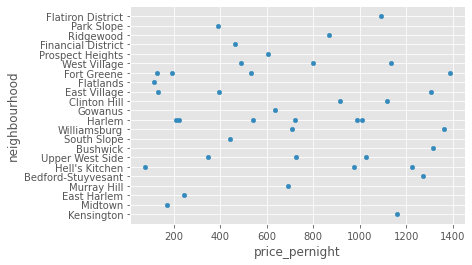

In [22]:
#Create figure and axis
fig,ax = plt.subplots ( )

#Create your plot here
df_loc_pricing [ : 40 ].plot ( kind= "scatter", x = "price_pernight", y = "neighbourhood", ax=ax )

### Q1: Top 10 location with highest rental listings

In [23]:
hi_value_rent = df_clean.loc[ :, ['neighbourhood_group','neighbourhood','price_pernight','room_type' ]].sort_values('price_pernight',ascending=False,)
hi_value_rent.head(10)


,neighbourhood_group,neighbourhood,price_pernight,room_type
2853,Brooklyn,Bushwick,1440.0,Private room
10484,Manhattan,Harlem,1440.0,Private room
37104,Manhattan,Harlem,1440.0,Private room
4047,Manhattan,Gramercy,1440.0,Private room
12807,Brooklyn,East New York,1440.0,Entire home/apt
9908,Brooklyn,Boerum Hill,1440.0,Entire home/apt
35553,Brooklyn,Bedford-Stuyvesant,1440.0,Private room
35393,Brooklyn,Prospect-Lefferts Gardens,1440.0,Private room
21746,Bronx,Belmont,1440.0,Entire home/apt
14425,Manhattan,Greenwich Village,1440.0,Private room


In [35]:
# total number of property in specific neighbourhood
neighbour_grp_breakdwn = hi_value_rent.groupby ( ['neighbourhood_group','neighbourhood','room_type','price_pernight']).size() 

neighbour_grp_breakdwn


neighbourhood_group  neighbourhood  room_type        price_pernight
Bronx                Allerton       Entire home/apt  79.0              1
                                                     173.0             1
                                                     206.0             1
                                                     415.0             2
                                                     455.0             3
                                                                      ..
Staten Island        West Brighton  Private room     1230.0            3
                                                     1243.0            3
                     Westerleigh    Entire home/apt  629.0             2
                                    Private room     666.0             2
                     Willowbrook    Entire home/apt  713.0             2
Length: 21427, dtype: int64

In [25]:
# use pd_df_convert function to flatten outputs
neighbour_grp_breakdwn_df = pd_df_convert ( neighbour_grp_breakdwn ) 
neighbour_grp_breakdwn_df

,neighbourhood_group,neighbourhood,room_type,price_pernight,total_listings
0,Bronx,Allerton,Entire home/apt,79.0,1
1,Bronx,Allerton,Entire home/apt,173.0,1
2,Bronx,Allerton,Entire home/apt,206.0,1
3,Bronx,Allerton,Entire home/apt,415.0,2
4,Bronx,Allerton,Entire home/apt,455.0,3
...,...,...,...,...,...
21422,Staten Island,West Brighton,Private room,1230.0,3
21423,Staten Island,West Brighton,Private room,1243.0,3
21424,Staten Island,Westerleigh,Entire home/apt,629.0,2
21425,Staten Island,Westerleigh,Private room,666.0,2


In [26]:
#rearrange according to largest number first in total listings series
top10_roomtype = neighbour_grp_breakdwn_df.nlargest ( 10, 'total_listings' )
top10_roomtype

,neighbourhood_group,neighbourhood,room_type,price_pernight,total_listings
1673,Brooklyn,Bedford-Stuyvesant,Private room,841.0,13
1263,Brooklyn,Bedford-Stuyvesant,Entire home/apt,1430.0,11
8001,Brooklyn,Williamsburg,Entire home/apt,647.0,11
8730,Brooklyn,Williamsburg,Private room,767.0,11
1479,Brooklyn,Bedford-Stuyvesant,Private room,494.0,10
8676,Brooklyn,Williamsburg,Private room,667.0,10
833,Brooklyn,Bedford-Stuyvesant,Entire home/apt,475.0,9
1015,Brooklyn,Bedford-Stuyvesant,Entire home/apt,882.0,9
1613,Brooklyn,Bedford-Stuyvesant,Private room,739.0,9
1666,Brooklyn,Bedford-Stuyvesant,Private room,827.0,9


<AxesSubplot:xlabel='neighbourhood', ylabel='total_listings'>

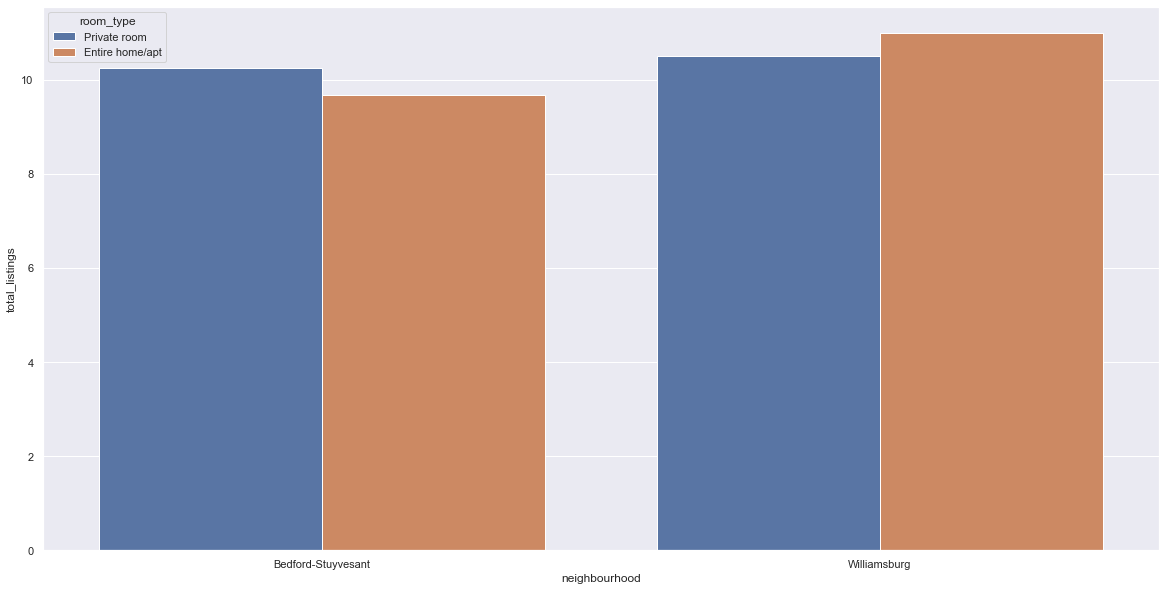

In [36]:
sns.set ( rc = { 'figure.figsize' : ( 20 , 10 ) } )

# compare between the types of accomodation in the most profitable are
sns.barplot( x = 'neighbourhood', y = 'total_listings', data = top10_roomtype , hue = "room_type", ci = None) 

### Q2: Top 10 neighbourhood with the  most affordable airbnb accomodations with highest review rate number

In [28]:
#new df
hi_review_rate_df = df_clean.loc [ : , ['room_type','neighbourhood_group','neighbourhood','price_pernight','review_numbers','review_rate_number']].sort_values(by='review_rate_number', ascending=False)

# filter and retain only the review rate 5
high_review_rate = hi_review_rate_df.loc[hi_review_rate_df['review_rate_number']== 5] 

high_review_rate[:]



,room_type,neighbourhood_group,neighbourhood,price_pernight,review_numbers,review_rate_number
17100,Private room,Manhattan,East Village,738.0,41.0,5.0
17678,Entire home/apt,Manhattan,Upper East Side,498.0,8.0,5.0
26606,Entire home/apt,Brooklyn,Williamsburg,134.0,76.0,5.0
26604,Private room,Brooklyn,Bedford-Stuyvesant,841.0,42.0,5.0
26602,Entire home/apt,Queens,Astoria,670.0,73.0,5.0
...,...,...,...,...,...,...
31883,Entire home/apt,Brooklyn,Prospect-Lefferts Gardens,1289.0,96.0,5.0
16216,Entire home/apt,Manhattan,Chinatown,480.0,17.0,5.0
12799,Entire home/apt,Manhattan,Lower East Side,890.0,6.0,5.0
32393,Entire home/apt,Queens,Far Rockaway,713.0,14.0,5.0


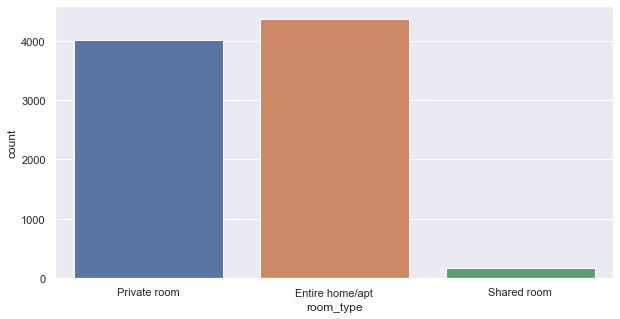

In [29]:
sns.set ( rc = { 'figure.figsize' : ( 10 , 5 ) } )

# All type of rooms that's above 5 rating
sns.countplot ( data = high_review_rate , x = 'room_type' ) 

# export as svg for colour correction
plt.savefig ( "Q2_room_count.svg" )

In [38]:
# filtering the lowest rental amongst the 5 star ratings
lowest_rent_df = high_review_rate.sort_values ( by='price_pernight', ascending=True) 

lowest_rent_df.head()




,room_type,neighbourhood_group,neighbourhood,price_pernight,review_numbers,review_rate_number
15239,Private room,Brooklyn,Crown Heights,60.0,34.0,5.0
21763,Entire home/apt,Manhattan,Harlem,60.0,2.0,5.0
28928,Private room,Queens,Flushing,61.0,4.0,5.0
27100,Entire home/apt,Brooklyn,Greenpoint,61.0,20.0,5.0
12130,Entire home/apt,Brooklyn,Greenpoint,61.0,20.0,5.0


In [39]:
# This filters removes everthing in the room type except Private room
private_room_df = lowest_rent_df[lowest_rent_df['room_type'].str.contains('Private room') == True][:10]

private_room_df.head()

,room_type,neighbourhood_group,neighbourhood,price_pernight,review_numbers,review_rate_number
15239,Private room,Brooklyn,Crown Heights,60.0,34.0,5.0
28928,Private room,Queens,Flushing,61.0,4.0,5.0
14077,Private room,Queens,Flushing,61.0,4.0,5.0
14945,Private room,Brooklyn,Greenpoint,62.0,2.0,5.0
15289,Private room,Brooklyn,Williamsburg,65.0,1.0,5.0


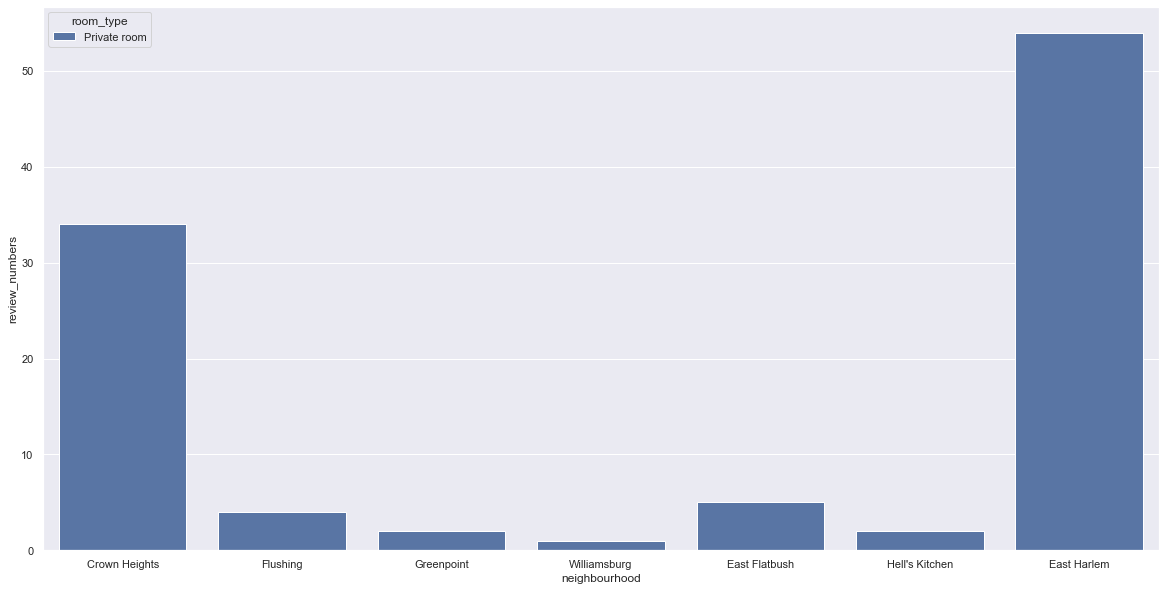

In [31]:
sns.set ( rc = {'figure.figsize' : ( 20 , 10 ) } )

# the lowest rent that is 5 star according to room type
sns.barplot ( x = 'neighbourhood' , y = 'review_numbers', ci=None , hue = "room_type", data = private_room_df) 

# export out at svg
plt.savefig("Q2_private_room_only.svg")

### Q3: What are the popular accomodation type based on total review number?

In [40]:
# creating a new df_loc_reviews
df_location_reviews = df_clean.loc[:, ['room_type','neighbourhood_group','neighbourhood','price_pernight','review_numbers', 'review_rate_number']].nlargest(100, ['review_rate_number','review_numbers']) 

df_location_reviews[:10]


,room_type,neighbourhood_group,neighbourhood,price_pernight,review_numbers,review_rate_number
7124,Private room,Queens,Jamaica,354.0,576.0,5.0
539,Private room,Queens,Flushing,1103.0,474.0,5.0
5067,Private room,Queens,East Elmhurst,475.0,448.0,5.0
1075,Entire home/apt,Manhattan,Tribeca,84.0,447.0,5.0
101,Entire home/apt,Queens,Astoria,558.0,414.0,5.0
5373,Private room,Queens,Richmond Hill,89.0,408.0,5.0
689,Entire home/apt,Brooklyn,Williamsburg,986.0,404.0,5.0
67,Entire home/apt,Brooklyn,South Slope,1246.0,398.0,5.0
4576,Private room,Brooklyn,Bedford-Stuyvesant,1178.0,397.0,5.0
7545,Private room,Queens,Springfield Gardens,1373.0,375.0,5.0


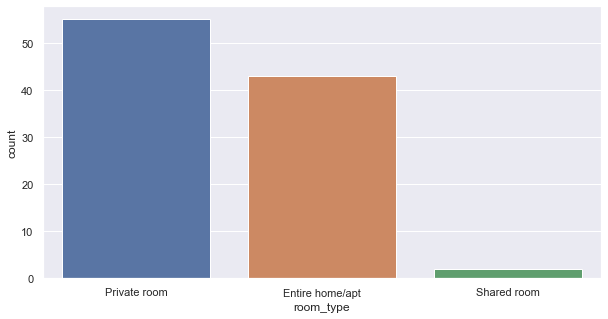

In [33]:
sns.set ( rc = {'figure.figsize' : ( 10 , 5 ) } )
sns.countplot ( x = df_location_reviews [ 'room_type' ] )

#export out as svg
plt.savefig("Q3_room_type_by_review-num.svg")

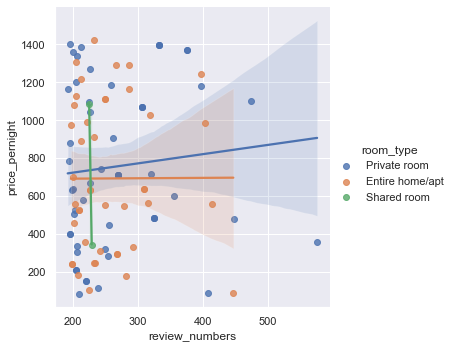

In [41]:
# sns.pairplot(df_loc_reviews, hue="room_type", diag_kind="hist", corner=True)
sns.lmplot ( x = "review_numbers", y = "price_pernight", hue = "room_type" , data = df_location_reviews )

### Q4: What is the highest number of property an owner/organisation can make in a neighbourhood group?

In [43]:
largest_listing_df = df_clean.loc[:,['host_name','calculated_host_listings_count','neighbourhood_group','neighbourhood','room_type']].nlargest(1000,'calculated_host_listings_count')

largest_listing_df [ 170 : 180 ] # check for listing

,host_name,calculated_host_listings_count,neighbourhood_group,neighbourhood,room_type
20889,Blueground,232.0,Manhattan,Upper East Side,Entire home/apt
33718,Blueground,232.0,Manhattan,Murray Hill,Entire home/apt
34949,Blueground,232.0,Manhattan,Upper East Side,Entire home/apt
36291,Blueground,232.0,Manhattan,Financial District,Entire home/apt
36427,Blueground,232.0,Manhattan,Battery Park City,Entire home/apt
5246,Kara,121.0,Manhattan,Financial District,Entire home/apt
5652,Kara,121.0,Manhattan,Chelsea,Entire home/apt
5665,Kara,121.0,Manhattan,Financial District,Entire home/apt
5719,Kara,121.0,Manhattan,Upper East Side,Entire home/apt
5815,Kara,121.0,Manhattan,Upper East Side,Entire home/apt


In [44]:
property_owner = largest_listing_df.groupby ( [ 'host_name' , 'neighbourhood_group' , 'room_type' ] ).size ( )
property_owner

host_name             neighbourhood_group  room_type      
Anting                Brooklyn             Private room         4
                      Manhattan            Entire home/apt      7
                      Queens               Private room         2
Blueground            Manhattan            Entire home/apt     25
CRNY Monthly Rentals  Manhattan            Entire home/apt     22
Corporate Housing     Manhattan            Entire home/apt     90
Eyal                  Manhattan            Private room         8
Hiroki                Manhattan            Private room         2
                      Queens               Private room        14
Host                  Manhattan            Entire home/apt     35
Jeniffer              Manhattan            Entire home/apt     30
Jeremy & Laura        Manhattan            Entire home/apt     71
                                           Private room         3
John                  Manhattan            Entire home/apt      2
                 

In [46]:
# use pd_df_convert function to flatten outputs
property_owner_breakdown_df = pd_df_convert ( property_owner )

property_owner_breakdown_df.head()

,host_name,neighbourhood_group,room_type,total_listings
0,Anting,Brooklyn,Private room,4
1,Anting,Manhattan,Entire home/apt,7
2,Anting,Queens,Private room,2
3,Blueground,Manhattan,Entire home/apt,25
4,CRNY Monthly Rentals,Manhattan,Entire home/apt,22


In [47]:
property_owner_breakdown_df = property_owner_breakdown_df.nlargest ( 10 ,'total_listings' )

property_owner_breakdown_df.head ( )

,host_name,neighbourhood_group,room_type,total_listings
30,Sonder (NYC),Manhattan,Entire home/apt,144
5,Corporate Housing,Manhattan,Entire home/apt,90
11,Jeremy & Laura,Manhattan,Entire home/apt,71
14,John,Manhattan,Private room,55
17,Kara,Manhattan,Entire home/apt,54


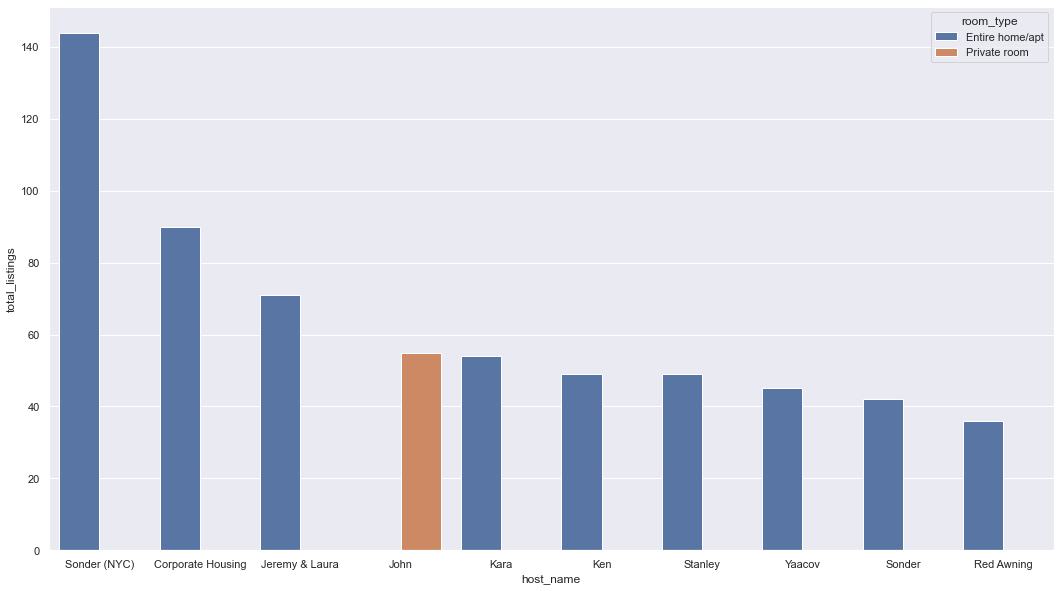

In [49]:
sns.set ( rc= {'figure.figsize' : (18 ,10 ) } )
sns.barplot ( data = property_owner_breakdown_df, x = 'host_name', y = 'total_listings', hue = 'room_type' )

plt.savefig ( "Q4_property_owners.svg" )


### Q5: Does the year of building construction affect the price?

In [51]:
# new df for year of construction
df_construct_yr = df_clean.loc [ :, [ 'name','room_type','neighbourhood_group', 'neighbourhood','construction_year','price_pernight' ] ] 

# filter out the oldest buildinng ever built
oldest_building_df = df_construct_yr.nsmallest ( 20 , 'construction_year' ) 

oldest_building_df.head ( )

,name,room_type,neighbourhood_group,neighbourhood,construction_year,price_pernight
20,Cozy BR in Wiliamsburg 3 Bedroom,Private room,Brooklyn,Williamsburg,2003.0,1360.0
59,Gigantic Private Brooklyn Loft!,Entire home/apt,Brooklyn,Greenpoint,2003.0,941.0
83,Sunny 3BR Apt Ideal for Family,Entire home/apt,Brooklyn,Crown Heights,2003.0,532.0
89,Large Park Slope Townhouse Duplex,Entire home/apt,Brooklyn,South Slope,2003.0,1165.0
104,City Room - Semi Private Bedroom,Private room,Manhattan,Harlem,2003.0,538.0


In [52]:
 #filter the most expensive price per night amongst the oldest year built
oldest_price = oldest_building_df.nlargest(20, 'price_pernight')

oldest_price.head ( )

,name,room_type,neighbourhood_group,neighbourhood,construction_year,price_pernight
182,"Lovely, Large Room in Crown Heights",Private room,Brooklyn,Crown Heights,2003.0,1385.0
20,Cozy BR in Wiliamsburg 3 Bedroom,Private room,Brooklyn,Williamsburg,2003.0,1360.0
315,Beautiful Room in a Beautiful New NYC Apartment,Private room,Manhattan,Harlem,2003.0,1180.0
89,Large Park Slope Townhouse Duplex,Entire home/apt,Brooklyn,South Slope,2003.0,1165.0
353,Stylish Designer Studio with Piano,Entire home/apt,Manhattan,Harlem,2003.0,1096.0


In [53]:
oldest_private_room = oldest_price[oldest_price['room_type'].str.contains ('Private room') == True ]
oldest_private_room [ ['room_type','construction_year','price_pernight' ] ]

,room_type,construction_year,price_pernight
182,Private room,2003.0,1385.0
20,Private room,2003.0,1360.0
315,Private room,2003.0,1180.0
104,Private room,2003.0,538.0
227,Private room,2003.0,528.0
138,Private room,2003.0,304.0


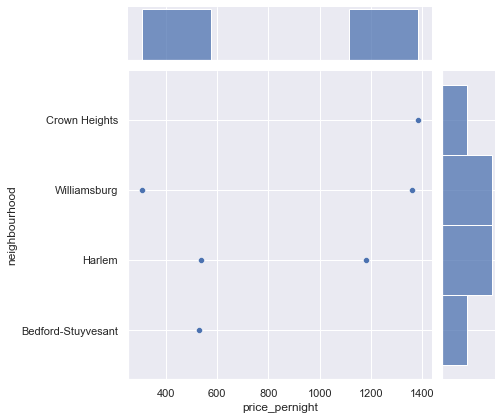

In [55]:
sns.jointplot ( data = oldest_private_room, x = "price_pernight", y = "neighbourhood" )

In [57]:
modern_building_df = df_construct_yr.nlargest ( 20 , 'construction_year' )
modern_building_df [ : 20 ]

,name,room_type,neighbourhood_group,neighbourhood,construction_year,price_pernight
24,Financial District Luxury Loft,Entire home/apt,Manhattan,Financial District,2022.0,464.0
66,One Bedroom Mini studio - Free WIFI,Entire home/apt,Queens,Astoria,2022.0,734.0
82,"Very Central, Nomad/Chelsea Loft Studio",Entire home/apt,Manhattan,Midtown,2022.0,610.0
109,Entire Apt in Heart of Williamsburg,Entire home/apt,Brooklyn,Williamsburg,2022.0,302.0
116,Charming upper west side apartment,Entire home/apt,Manhattan,Upper West Side,2022.0,492.0
128,Chateau Style Brooklyn Loft for Singles or Cou...,Entire home/apt,Brooklyn,Bedford-Stuyvesant,2022.0,496.0
143,Ideal Brooklyn Brownstone Apartment,Entire home/apt,Brooklyn,Bedford-Stuyvesant,2022.0,773.0
148,Central Bedford Avenue Apartment,Entire home/apt,Brooklyn,Williamsburg,2022.0,428.0
154,Quiet One Bedroom in Park Slope,Entire home/apt,Brooklyn,Gowanus,2022.0,568.0
173,Private Room Near Brooklyn Museum,Private room,Brooklyn,Prospect Heights,2022.0,68.0


In [58]:
modern_building_df.nlargest ( 10 , 'price_pernight' )

,name,room_type,neighbourhood_group,neighbourhood,construction_year,price_pernight
360,"ECO-APT, free YOGA, 2 new bedrooms. Best locat...",Entire home/apt,Brooklyn,Carroll Gardens,2022.0,1304.0
449,GREAT BRAND NEW 1 BED APT*TIMES SQ,Entire home/apt,Manhattan,Hell's Kitchen,2022.0,943.0
295,Room in Huge 1200sf W Harlem Suite,Private room,Manhattan,Harlem,2022.0,917.0
393,A REAL New Yorkers Wall St,Entire home/apt,Manhattan,Financial District,2022.0,805.0
143,Ideal Brooklyn Brownstone Apartment,Entire home/apt,Brooklyn,Bedford-Stuyvesant,2022.0,773.0
66,One Bedroom Mini studio - Free WIFI,Entire home/apt,Queens,Astoria,2022.0,734.0
82,"Very Central, Nomad/Chelsea Loft Studio",Entire home/apt,Manhattan,Midtown,2022.0,610.0
296,"Huge, Sunny, Open Loft in Brooklyn",Entire home/apt,Brooklyn,Bushwick,2022.0,576.0
154,Quiet One Bedroom in Park Slope,Entire home/apt,Brooklyn,Gowanus,2022.0,568.0
180,Brooklyn Brownstone apartment,Entire home/apt,Brooklyn,Bedford-Stuyvesant,2022.0,556.0


In [60]:
modern_private_room = modern_building_df [ modern_building_df['room_type'].str.contains ( 'Private room' ) == True ][ : 20 ]
modern_private_room [ [ 'room_type' , 'construction_year' , "price_pernight" ] ]

,room_type,construction_year,price_pernight
173,Private room,2022.0,68.0
174,Private room,2022.0,71.0
295,Private room,2022.0,917.0
472,Private room,2022.0,120.0


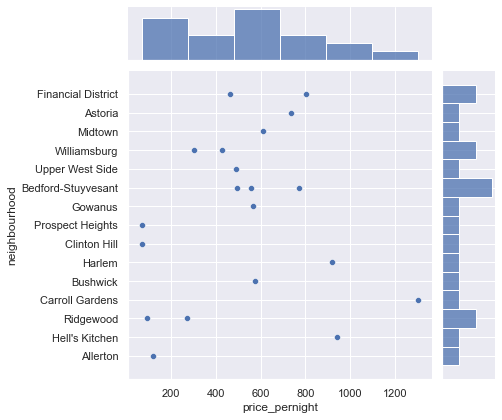

In [61]:
sns.jointplot ( data = modern_building_df , x = "price_pernight" , y = "neighbourhood" )

### Q6: Other than the condition of the accomodation and or host's services, does the location of the rental place  plays a hand in the bad review?

In [62]:
# new df for rating 1 review
rating1_review_df = df_clean.loc [ : , [ 'room_type' , 'neighbourhood_group' , 'neighbourhood' , 'cancellation_policy' , 'review_numbers' , 'house_rules' , 'review_rate_number' ] ].nsmallest (20 , 'review_rate_number' ) 
rating1_review_df.head()

,room_type,neighbourhood_group,neighbourhood,cancellation_policy,review_numbers,house_rules,review_rate_number
11,Entire home/apt,Brooklyn,Williamsburg,strict,29.0,This is a pretty quiet house in a residential ...,1.0
12,Private room,Manhattan,Harlem,flexible,170.0,"No smoking, drugs, loud volume, loud partying ...",1.0
14,Private room,Manhattan,Hell's Kitchen,strict,334.0,You will be very comfortable in our home but w...,1.0
26,Entire home/apt,Manhattan,West Village,strict,86.0,We expect guests to treat this as they would t...,1.0
28,Entire home/apt,Manhattan,West Village,strict,38.0,I appreciate guests on the quiet side who are ...,1.0


In [63]:
hi_rating1_review  = rating1_review_df.nlargest ( 1000 , 'review_numbers' ) 
hi_rating1_review.head()

,room_type,neighbourhood_group,neighbourhood,cancellation_policy,review_numbers,house_rules,review_rate_number
97,Entire home/apt,Manhattan,East Village,moderate,403.0,NO Smoking,1.0
14,Private room,Manhattan,Hell's Kitchen,strict,334.0,You will be very comfortable in our home but w...,1.0
87,Private room,Brooklyn,Crown Heights,strict,247.0,Cleaning fee only applies to stays under 4 nig...,1.0
66,Entire home/apt,Queens,Astoria,moderate,198.0,Please no smoking inside. During the warmer m...,1.0
50,Private room,Brooklyn,Williamsburg,moderate,181.0,ANDREA’S HOUSE RULES: ** The PINK ROOM is a r...,1.0


In [65]:
cluster_badreview = hi_rating1_review.groupby(['neighbourhood_group', 'neighbourhood']).size()
cluster_badreview

neighbourhood_group  neighbourhood     
Brooklyn             Crown Heights         1
                     Fort Greene           1
                     Greenpoint            1
                     Williamsburg          4
                     Windsor Terrace       1
Manhattan            Chelsea               1
                     East Village          1
                     Harlem                3
                     Hell's Kitchen        1
                     Midtown               1
                     Washington Heights    1
                     West Village          2
Queens               Astoria               1
                     Sunnyside             1
dtype: int64

In [ ]:
cluster_badreview = pd_df_convert(cluster_badreview)
cluster_badreview[['neighbourhood', 'total_listings']]

### Q7: Does the being verified matter from the perspective of the number of reviews from customers

In [ ]:
verify_df = df_clean.loc[:,['room_type','host_identity_verified','review_rate_number']]
verify_df

In [ ]:
total_verify_owners = verify_df.groupby(['host_identity_verified', 'review_rate_number']).size()
total_verify_owners

In [ ]:
total_verify_owners = pd_df_convert(total_verify_owners)
total_verify_owners 

In [ ]:
sns.set (rc={'figure.figsize':(20,10)})
sns.barplot(x = 'review_rate_number' , y = 'total_listings', hue = 'host_identity_verified', ci=None , data = total_verify_owners )
plt.savefig("Q7_verified.svg")

# common word appears in the listings

In [ ]:
common_word_df = df_clean.loc[:, ['host_name','name','neighbourhood_group','neighbourhood','price_pernight','house_rules']].sort_values('price_pernight',ascending=False,)
common_word_df

In [ ]:
common_word_df.to_csv('word_count_top.csv',index=True)

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

print( word_count('the quick brown fox jumps over the lazy dog.'))

In [ ]:
word_count('no-smoking in the apartment no-smoking no pets no-smoking no pets we live on the 3rd floor of a 3-family house so please minimize noise for our neighbours especially at night and when entering or exiting our bedroom and office are not for guest use please keep shoes off while inside. food should be kept in the kitchen dining area be mindful of our great neighbours and keep noise to a reasonable level. no pets or no-smoking please! no-smoking except smoke deck. guests are expected to keep the apartment clean and in good condition. noise level should be kept at a reasonable level past 9:30 pm, as this a quiet neighbourhood. no-smoking in the apartment but guests can smoke on the porch. small dogs and cats are allowed, but bigger pets will require prior approval. treat the home as you would your own. if staying through a trash day, please leave trash by curb. house rules the house rules are an important part of staying in this condo.  you will be sharing a living space with other guests and a high level of consideration, respect, communication and tolerance is expected from you. they are meant to make your stay more pleasant to prevent conflicts and to protect the property of any damage. if you feel there is something that needs to be addressed and that is not covered in these rules, please make sure you communicate that to the host toilet the toilettes can only be used with toilet paper provided. any other material disposed of will cause the plumbing system to back up and create drainage problems. no tissues, cotton balls, tampons, q-tips cotton swabs or any kind of sanitary products are allowed down the toilets. any plumbing work due to clogged toilets will be charged to the guests noise and quiet hours quiet hours are from 10pm until 7am. during quiet hours radios and stereos may be played at a level not to be heard')

In [ ]:
def pd_df_convert(variable):
    variable = pd.DataFrame(data=variable)
    variable.reset_index(inplace=True) #reset multi index issue
    variable.rename(columns={0: "total_listings"}, inplace=True) #rename the 0 default column to 'total_listings'
    return variable

your_new_df_name = pd_df_convert()